In [5]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from dotenv import load_dotenv
import os

load_dotenv()
consumerKey = os.environ['CONSUMER_KEY']
consumerSecret = os.environ['CONSUMER_SECRET']
accessToken = os.environ['ACCESS_TOKEN']
accessTokenSecret = os.environ['ACCESS_TOKEN_SECRET']


In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [12]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="elonmusk", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Unexpected parameter: lang


Show the 5 recent tweets:

1) @Timcast !

2) @ali_moiz Wow, half!

3) @Rainmaker1973 He was great

4) @teslaownersSV @CNBC How times have changed

5) @stclairashley That would be interesting



In [4]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@zerohedge Publicly funded PBS joins publicly ...
1,@tjdharamsi @ehikian 🤣
2,@ehikian Maybe we should use something else or...
3,@ggreenwald @ISDglobal This cast of characters...
4,@mezaoptimizer Interesting


In [5]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Publicly funded PBS joins publicly funded NPR...
1,🤣
2,Maybe we should use something else or make ou...
3,This cast of characters show up a lot
4,Interesting
...,...
90,Almost no one among the cognoscenti even know...
91,Their technology is so ancient. World of Warc...
92,_doge 🤣🤣
93,Nice


In [6]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Publicly funded PBS joins publicly funded NPR...,0.066667,0.000000
1,🤣,0.000000,0.000000
2,Maybe we should use something else or make ou...,1.000000,0.600000
3,This cast of characters show up a lot,0.000000,0.000000
4,Interesting,0.500000,0.500000
...,...,...,...
90,Almost no one among the cognoscenti even know...,0.293333,-0.075000
91,Their technology is so ancient. World of Warc...,0.300000,0.250000
92,_doge 🤣🤣,0.000000,0.000000
93,Nice,1.000000,0.600000


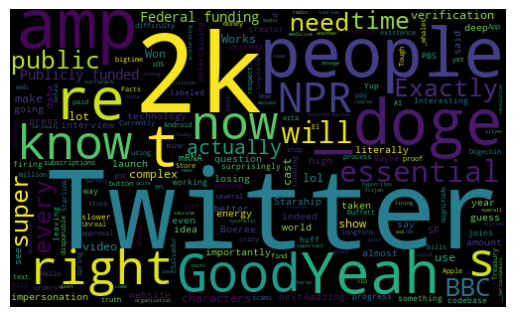

In [7]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Publicly funded PBS joins publicly funded NPR...,0.066667,0.000000,Neutral
1,🤣,0.000000,0.000000,Neutral
2,Maybe we should use something else or make ou...,1.000000,0.600000,Positive
3,This cast of characters show up a lot,0.000000,0.000000,Neutral
4,Interesting,0.500000,0.500000,Positive
...,...,...,...,...
90,Almost no one among the cognoscenti even know...,0.293333,-0.075000,Negative
91,Their technology is so ancient. World of Warc...,0.300000,0.250000,Positive
92,_doge 🤣🤣,0.000000,0.000000,Neutral
93,Nice,1.000000,0.600000,Positive


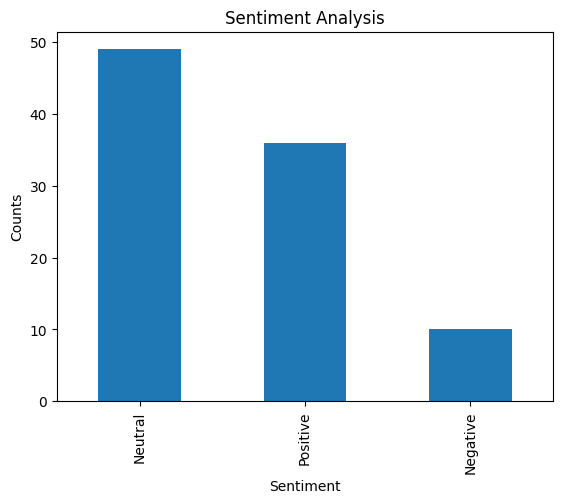

In [9]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()